<a href="https://colab.research.google.com/github/sezinbiner/Covid_X_ray_Classification/blob/main/load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='binary')

Found 1232 images belonging to 2 classes.


In [3]:
def metric(model, test_features, test_labels):
  from sklearn import metrics
  y_pred = model.predict(test_features)
  probas = np.array(y_pred)
  labels = []
  for prob in probas:
    if prob < 0.5:
      labels.append(0)
    else:
      labels.append(1)
  y_true_labels = test_labels
  y_pred_labels = labels
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_true_labels, y_pred_labels)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_true_labels, y_pred_labels, average='micro')
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
  print('F1 score: %f' % f1)
  from sklearn.metrics import classification_report
  print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(y_true_labels, y_pred_labels))
  print(y_pred_labels)
  return y_pred_labels

In [4]:
def extract_features(number_of_images, generator, batch_size, extraction_layer):
  features = np.zeros(shape=(number_of_images, extraction_layer.output_shape[1], extraction_layer.output_shape[2], extraction_layer.output_shape[3]))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [5]:
from tensorflow.python.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.python.keras.applications.densenet import DenseNet201
from tensorflow.python.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.applications.nasnet import NASNetMobile
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg19 import VGG19
import numpy as np
from keras.models import Model

In [6]:
extraction_densenet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
#extraction_densenet.summary()
extraction_layer_densenet = Model(extraction_densenet.input, extraction_densenet.layers[-5].output)
test_features_densenet, test_labels_densenet = extract_features(1232, test_generator, test_generator.batch_size, extraction_layer_densenet)
from keras.models import load_model
dense_net_model = load_model("/content/gdrive/MyDrive/model_k_fold/resnet_deneme.h5")
#dense_net_model.summary()
pred_labels = metric(dense_net_model, test_features_densenet, test_labels_densenet)

loop
loop over
Accuracy: 0.981331
Precision: 0.981331
Recall: 0.981331
F1 score: 0.981328
              precision    recall  f1-score   support

       covid       0.99      0.97      0.98       616
      normal       0.97      0.99      0.98       616

    accuracy                           0.98      1232
   macro avg       0.98      0.98      0.98      1232
weighted avg       0.98      0.98      0.98      1232

[[597  19]
 [  4 612]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


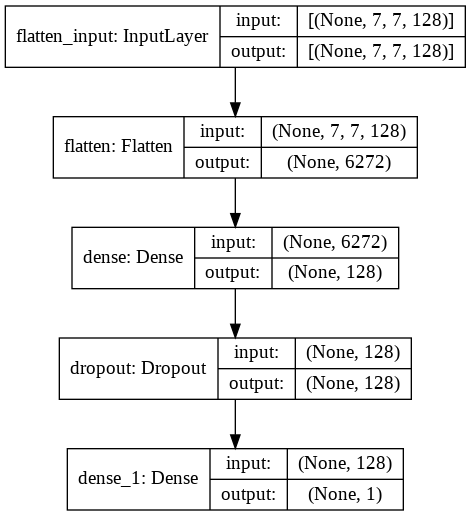

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(dense_net_model, to_file='/content/gdrive/MyDrive/model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
extraction_resnet = ResNet50V2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_resnet.summary()
extraction_layer_resnet = Model(extraction_resnet.input, extraction_resnet.layers[-5].output)
test_features_resnet, test_labels_resnet = extract_features(1232, test_generator, test_generator.batch_size, extraction_layer_resnet)
from keras.models import load_model
resnet_model = load_model("/content/gdrive/MyDrive/model_k_fold/resNet_fold2.h5")
resnet_model.summary()
pred_labels = metric(resnet_model, test_features_resnet, test_labels_resnet)

94674944/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


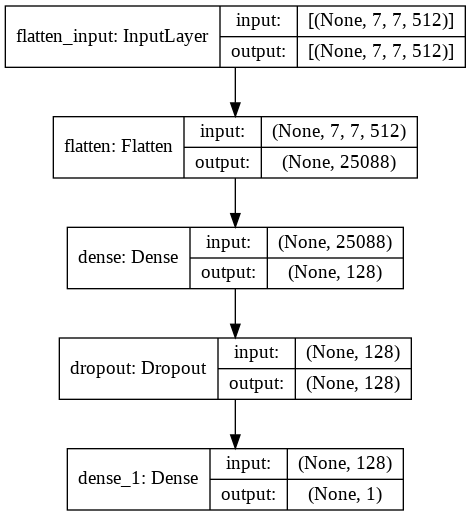

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(resnet_model, to_file='/content/gdrive/MyDrive/model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
extraction_inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_inception.summary()
extraction_inception = Model(extraction_inception.input, extraction_inception.layers[-4].output)
test_features_inception, test_labels_inception = extract_features(1232, test_generator, test_generator.batch_size, extraction_inception)
from keras.models import load_model
inception_model = load_model("/content/gdrive/MyDrive/model_k_fold/inception_fold2.h5")
inception_model.summary()
pred_labels = metric(inception_model, test_features_inception, test_labels_inception)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [11]:
extraction_vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_vgg16.summary()
extraction_vgg16 = Model(extraction_vgg16.input, extraction_vgg16.output)
test_features_vgg16, test_labels_vgg16 = extract_features(1232, test_generator, test_generator.batch_size, extraction_vgg16)
from keras.models import load_model
vgg16_model = load_model("/content/gdrive/MyDrive/model_k_fold/vgg_16_fold1.h5")
vgg16_model.summary()
pred_labels = metric(vgg16_model, test_features_vgg16, test_labels_vgg16)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [12]:
extraction_vgg19 = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_vgg19.summary()
extraction_vgg19 = Model(extraction_vgg19.input, extraction_vgg19.output)
test_features_vgg19, test_labels_vgg19 = extract_features(1232, test_generator, test_generator.batch_size, extraction_vgg19)
from keras.models import load_model
vgg19_model = load_model("/content/gdrive/MyDrive/model_k_fold/vgg19_fold3.h5")
vgg19_model.summary()
pred_labels = metric(vgg19_model, test_features_vgg19, test_labels_vgg19)

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [13]:
extraction_nasnet = NASNetMobile(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_nasnet.summary()
extraction_nasnet = Model(extraction_nasnet.input, extraction_nasnet.layers[-6].output)
test_features_nasnet, test_labels_nasnet = extract_features(1232, test_generator, test_generator.batch_size, extraction_nasnet)
from keras.models import load_model
nasnet_model = load_model("/content/gdrive/MyDrive/model_k_fold/nasnet_fold3.h5")
nasnet_model.summary()
pred_labels = metric(nasnet_model, test_features_nasnet, test_labels_nasnet)

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
